# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [116]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import seaborn as sns

In [60]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [61]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Abha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


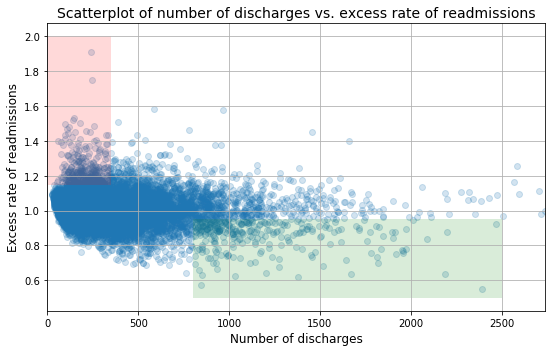

In [62]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the analysis and recommendations. What sticks out to me intially is they are only looking at hopsitals with charges less than a 100 and greater than 1000. Where are the findings for hospitals between 100 and 1000? It is an incomplete analysis. Further, readmission rates of 1.023 and 0.978 do not seem very far apart. How are we to know this is statistically significant?

Since the median number of discharge is 280, I will look to see if there any statistical signifance for discharges above 280 and below 280. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [79]:
#Checking data and any further null values

In [63]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [80]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [64]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [65]:
#check to see for null values for Number of Discharges
clean_hospital_read_df['Number of Discharges'].isnull().values.any()

False

In [66]:
#check eto see for null values for Excess Readmission Ratio
clean_hospital_read_df['Excess Readmission Ratio'].isnull().values.any()

True

In [74]:
#Create new dataframe with only Number of Discharge and Excess Readmission Ratio
new_df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]

new_df = new_df.dropna()

print(new_df)

       Number of Discharges  Excess Readmission Ratio
1832                     25                    1.0914
1699                     27                    1.0961
1774                     28                    1.0934
1853                     29                    1.0908
1290                     30                    1.1123
1602                     31                    1.0992
2048                     33                    1.0847
2441                     34                    1.0738
2512                     34                    1.0720
2825                     34                    1.0651
3828                     35                    1.0444
5125                     35                    1.0228
3312                     35                    1.0548
2378                     35                    1.0756
2670                     35                    1.0683
2944                     35                    1.0622
1238                     36                    1.1149
1395                     36 

##### 1. Setup an appropriate hypothesis test.

Null hypothesis: There is no difference in mean Excess Admissions Ratio
Alternate hypothesis: There is a statistically significant difference in mean Excess Admissions Ratio

##### 2. Compute and report the observed significance value (or p-value).

In [75]:
def pearson_r(x, y):
    
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0,1]


r = pearson_r(new_df['Number of Discharges'], new_df['Excess Readmission Ratio'])

print(r)

-0.09739794351079353


The pearson correlation number of -0.097 suggests that there is an incredibly small to no correlation. 

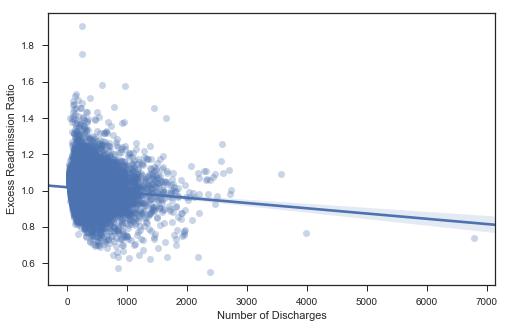

In [161]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=new_df['Number of Discharges'], y= new_df['Excess Readmission Ratio'], data=new_df,scatter_kws={'alpha':0.3})

The regression line visually shows there is a slightly negative correlation between the number of discharges and excess readmission ratio. 

In [95]:
#create dataframe with less than 100 discharges
df_100 = new_df[new_df['Number of Discharges'] < 100]

r_100 = pearson_r(df_100['Number of Discharges'],df_100['Excess Readmission Ratio'])
print(r_100)

-0.24463550033476292


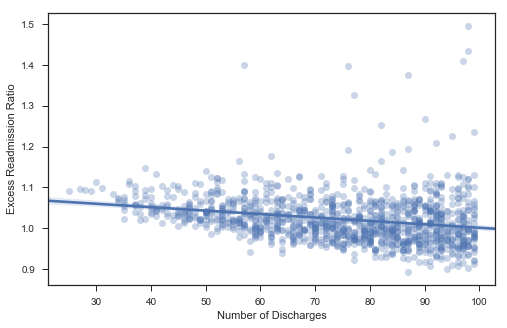

In [162]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df_100['Number of Discharges'], y= df_100['Excess Readmission Ratio'], data=new_df,scatter_kws={'alpha':0.3})

In [97]:
#create dataframe with more than 1000 discharges
df_1000 = new_df[new_df['Number of Discharges'] > 1000]

r_1000 = pearson_r(df_1000['Number of Discharges'],df_1000['Excess Readmission Ratio'])
print(r_1000)

-0.07927665679036346


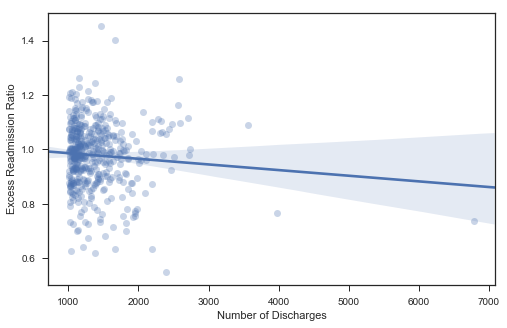

In [163]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df_1000['Number of Discharges'], y= df_1000['Excess Readmission Ratio'], data=new_df,scatter_kws={'alpha':0.3})

In [102]:
#create dataframe with more than 280 discharges
df_greater_than_280 = new_df[new_df['Number of Discharges'] > 280]

r_greater_than_280 = pearson_r(df_greater_than_280['Number of Discharges'],df_greater_than_280['Excess Readmission Ratio'])
print(r_greater_than_280)

-0.07818774970094687


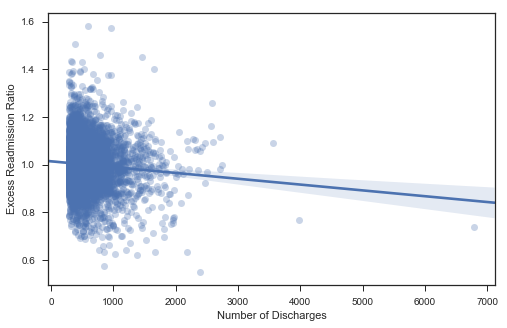

In [164]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df_greater_than_280['Number of Discharges'], y= df_greater_than_280['Excess Readmission Ratio'], data=new_df,scatter_kws={'alpha':0.3})

In [104]:
#create dataframe with less than or equal to 280
df_280 = new_df[new_df['Number of Discharges'] <= 280]

r_280 = pearson_r(df_280['Number of Discharges'],df_280['Excess Readmission Ratio'])
print(r_1000)

-0.07927665679036346


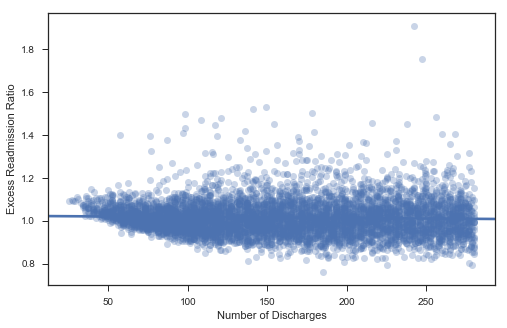

In [172]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df_280['Number of Discharges'], y= df_280['Excess Readmission Ratio'], data=new_df,scatter_kws={'alpha':0.3})

In [108]:
print('Pearson Correlation for all valid data:', +r)
print('Pearson Correlation for discharges below 100:', +r_100)
print('Pearson Correlation for discharges greater than 1000:', +r_1000)
print('Pearson Correlation for discharges greater than 280:', +r_greater_than_280)
print('Pearson Correlation for discharges less than or equal to 280:', +r_280)

Pearson Correlation for all valid data: -0.09739794351079353
Pearson Correlation for discharges below 100: -0.24463550033476292
Pearson Correlation for discharges greater than 1000: -0.07927665679036346
Pearson Correlation for discharges greater than 280: -0.07818774970094687
Pearson Correlation for discharges less than or equal to 280: -0.03780492347812414


In [121]:
#calculating t statistic and p-value for discharge less than 100 and greater than 1000
t1 = st.ttest_ind(df_100['Excess Readmission Ratio'], df_1000['Excess Readmission Ratio'])
print(t1)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)


In [120]:
#calculating t statistic and p-value for discharge less than or equal to 280 and greater than 280
t2 = st.ttest_ind(df_greater_than_280['Excess Readmission Ratio'], df_280['Excess Readmission Ratio'])
print(t2)

Ttest_indResult(statistic=-8.040334034403072, pvalue=9.835909431482523e-16)


While the correlation in all the specific datasets is insignificant, the p-values and t statistic reject the null hypothesis. Thus there is a statistical significance in mean Excess Admissions Ratio. 

##### 3. Report statistical significance for $\alpha$ = .01.

stats.t.interval(alpha = Confidence level), df= degrees of freedom, loc = sample_mean, scale = sigma)           

In [131]:
#calculate the confidence interval for the entire viable dataset
dof= len(new_df) - 2

confidence_interval = stats.t.interval(alpha = 0.995, df= dof)
print(confidence_interval)
print(t2)

(-2.807575946603236, 2.8075759466032433)
Ttest_indResult(statistic=-8.040334034403072, pvalue=9.835909431482523e-16)


In [130]:
#confidence interval for less than 100 and greater than 1000
df1 = df_100 + df_1000
dof1 = len(df1) - 2
confidence_interval1 = stats.t.interval(alpha = 0.995, df = dof1)
print(confidence_interval1)
print(t1)

(-2.8108172865854466, 2.8108172865854537)
Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)


The confidence interval supports that there is statistical signficance in the p-value and t statistic. While the correlation is small, it does exist. I cannot say the changes they are proposing are the correct changes. There should be further studies done and data should be looked more deeply. 

## Look at the scatterplot above.



##### What are the advantages and disadvantages of using this plot to convey information?

The advantages of the above plot is you can visualize all the data in one place. Each item in the data is represented, however, that leads to one of its pitfalls as well. It is hard to see with the high volume of data points. Another disadvantage is your eye goes to the green and red box, which leads the reader to those datasets. It makes you wonder why discharges between 300 and 1000 are not being looked at. 

##### Construct another plot that conveys the same information in a more direct manner.

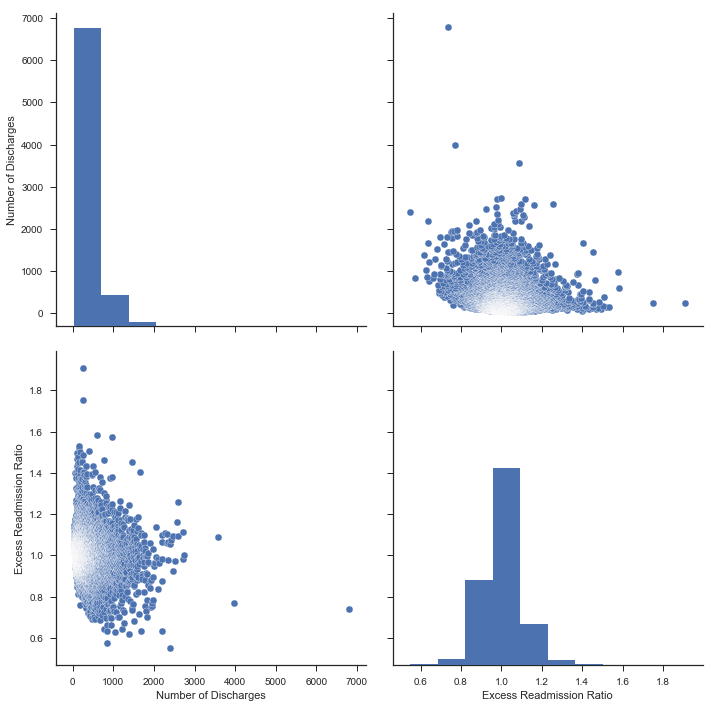

In [157]:
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(new_df, size = 5)

C:\Users\Abha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x576 with 0 Axes>

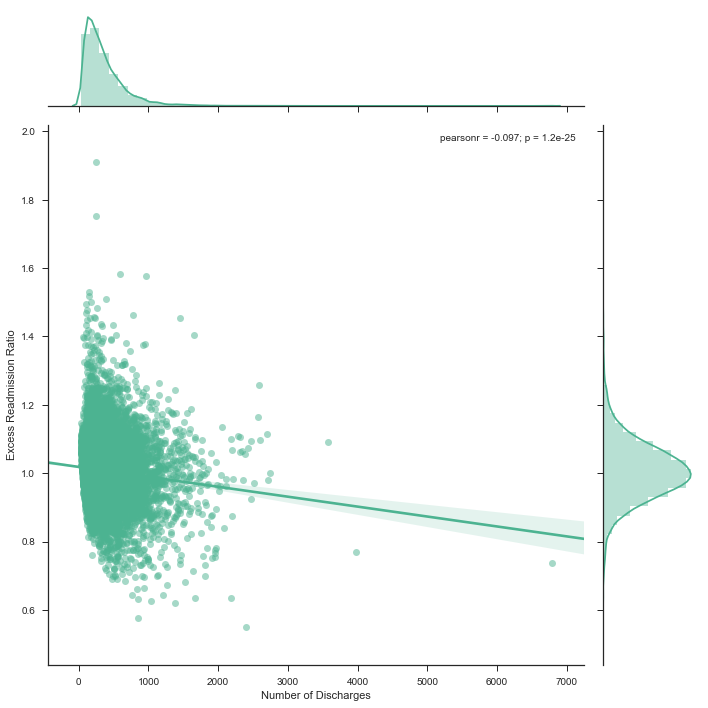

In [158]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

plt.figure(figsize=(12,8))
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data = clean_hospital_read_df,
              scatter_kws={'alpha':0.5} ,kind="reg", color="#4CB391",size=10) 

